<a href="https://colab.research.google.com/github/ankit-chuahan/Air_bnb_project/blob/main/Ankit_web_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Getting URL

from bs4 import BeautifulSoup
import requests

url = 'https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=data+science&txtLocation=&pageNum'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
print(soup)



<!DOCTYPE html>

<head>
<link href="https://fonts.googleapis.com/css?family=Poppins:400,500,600,700" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/>
<link href="https://static.timesjobs.com/newtj_css//css/tj_css/usability/materialize.css?v=7.1.7" media="all" rel="stylesheet" type="text/css">
<link href="https://static.timesjobs.com/newtj_css//css/tj_css/usability/global-usability.css?v=7.1.7" media="all" rel="stylesheet" type="text/css">
<link href="https://static.timesjobs.com/newtj_css//css/tj_css/usability/srp-usability.css?v=7.1.7" media="all" rel="stylesheet" type="text/css"/>
<script src="https://static.timesjobs.com/newtj_js/scripts/tj_scripts/usability/jquery-3.3.1.min.js" type="text/javascript"></script>
<script src="https://static.timesjobs.com/newtj_js/scripts/jquery.tokeninput.js" type="text/javascript"></script>
<!-- <script type="text/javascript" src="https://code.angularjs.org/1.7.0/angular.min.js"></script> -->

In [ ]:
# Defining Empty lists for collecting scrap data

job_tittle_=[]
company_name_=[]
experience_require=[]
locality=[]


In [ ]:
li_tags = soup.find_all('li', class_="clearfix job-bx wht-shd-bx")
# job title
for item in li_tags:
    try:
        job_title = item.find('h2').text.strip()
    except AttributeError:
        job_title = "N/A"

    job_tittle_.append(job_title)

# company name

for item in li_tags:
    try:
        company_name = item.find('h3', class_='joblist-comp-name').text.strip()
    except AttributeError:
        company_name = "N/A"

    company_name_.append(company_name)

# Experience required

for item in li_tags:
    try:
        experience = item.find('li').text.strip()[11:]
    except (AttributeError, IndexError):
        experience = "N/A"

    experience_require.append(experience)

# Job location

for item in li_tags:
    try:
        location_list = item.find('ul', class_='top-jd-dtl clearfix').find_all('li')
        if len(location_list) >= 2:
            location = location_list[1].text.strip()
        else:
            location = "N/A"
    except (AttributeError, IndexError):
        location = "N/A"

    locality.append(location)




In [ ]:
# Printing of all the list
print(job_tittle_)
print(company_name_)
print(experience_require)
print(locality)


['Data Science', 'Data Science', 'Data Science', 'Data Science', 'Data Science Internship in Mumbai', 'Data Science Internship in Pune', 'Data Science Internship in Ahmedabad', 'Data Science Internship in Pune', 'Data Science Internship in Pune', 'Data Science Internship in Ahmedabad', 'Data Science Internship in Ahmedabad', 'Data Science Internship in Ahmedabad', 'Data Science Internship in Pune', 'Data Science Internship in Mumbai', 'Data Science Internship in Mumbai', 'Data Science Internship in Pune', 'Data Science Classroom Trainer', 'Data Science Internship in Ahmedabad', 'Data Science Internship in Mumbai', 'Data Science Internship in Mumbai', 'Data Science Internship in Ahmedabad', 'Data Science Internship', 'Data Science Internship in Pune', 'Data Science Internship in Pune', 'Data Science Internship in Pune']
['HyreFox Consultants', 'tcg digital solutions pvt ltd', 'innefu labs pvt. ltd.', 'bprise pvt ltd', 'Maxgen Technologies\r\n     (More Jobs)', 'Maxgen Technologies\r\n  

In [ ]:
print(len(job_tittle_))
print(len(company_name_))
print(len(experience_require))
print(len(locality))


25
25
25
25


In [ ]:
data_df =pd.DataFrame({'Job Title':job_tittle_,'Company Name':company_name_,'Experience Req':experience_require, 'Location':locality})

In [ ]:
import os

directory = 'C:\\Users\\a8273\\OneDrive\\Documents\\web_scrap'
os.makedirs(directory, exist_ok=True)

file_path = os.path.join(directory, 'data.csv')
data_df.to_csv(file_path, index=False)


In [ ]:
data_df

,Job Title,Company Name,Experience Req,Location
0,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
1,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
2,Data Science,HyreFox Consultants,5 - 8 yrs,location_on\nChennai
3,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,location_on\nKolkata
4,Data Science,innefu labs pvt. ltd.,4 - 6 yrs,"location_on\nDelhi, Delhi/NCR"
5,Data Science,bprise pvt ltd,3 - 6 yrs,location_on\nMumbai
6,Data Science Internship in Mumbai,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nMumbai, Kalyan, Nasik, Navi Mu..."
7,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
8,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
9,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# top 10 rows
data_df.head(10)

,Job Title,Company Name,Experience Req,Location
0,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
1,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
2,Data Science,HyreFox Consultants,5 - 8 yrs,location_on\nChennai
3,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,location_on\nKolkata
4,Data Science,innefu labs pvt. ltd.,4 - 6 yrs,"location_on\nDelhi, Delhi/NCR"
5,Data Science,bprise pvt ltd,3 - 6 yrs,location_on\nMumbai
6,Data Science Internship in Mumbai,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nMumbai, Kalyan, Nasik, Navi Mu..."
7,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
8,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
9,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.


In [ ]:
# Last 10 rows
data_df.tail(10)

,Job Title,Company Name,Experience Req,Location
15,Data Science Internship in Mumbai,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nMumbai, Kalyan, Nasik, Navi Mu..."
16,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
17,Data Science Classroom Trainer,NARESH I TECHNOLOGIES\r\n (More Jobs),5 - 10 yrs,₹Rs 5.00 - 10.00 Lacs p.a.
18,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
19,Data Science Internship in Mumbai,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nMumbai, Kalyan, Nasik, Navi Mu..."
20,Data Science Internship in Mumbai,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nMumbai, Kalyan, Nasik, Navi Mu..."
21,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
22,Data Science Internship,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,"location_on\nAhmedabad, Mehsana, Rajkot, Su..."
23,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
24,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.


In [ ]:
# columns of dataset
data_df.columns

Index(['Job Title', 'Company Name', 'Experience Req', 'Location'], dtype='object')

In [ ]:
# information about dataset

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Job Title       25 non-null     object
 1   Company Name    25 non-null     object
 2   Experience Req  25 non-null     object
 3   Location        25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


In [ ]:
data_df.describe()

,Job Title,Company Name,Experience Req,Location
count,25,25,25,25
unique,6,6,6,9
top,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0 - 1 yrs,₹Rs 1.00 - 2.00 Lacs p.a.
freq,8,20,20,8


In [ ]:
# null values
data_df.isnull().sum()

Job Title         0
Company Name      0
Experience Req    0
Location          0
dtype: int64

In [ ]:
# Convert 'Job Title' column to title case
data_df['Job Title'] = data_df['Job Title'].str.title()

# Combine 'Data Science' and 'data science' by count
data_df['Job Title'] = data_df['Job Title'].replace({'Data Science.': 'Data Science'})

# To verify the change:
title_counts = data_df['Job Title'].value_counts()
print(title_counts)

Data Science Internship In Pune         8
Data Science Internship In Ahmedabad    6
Data Science Internship In Mumbai       5
Data Science                            4
Data Science Classroom Trainer          1
Data Science Internship                 1
Name: Job Title, dtype: int64


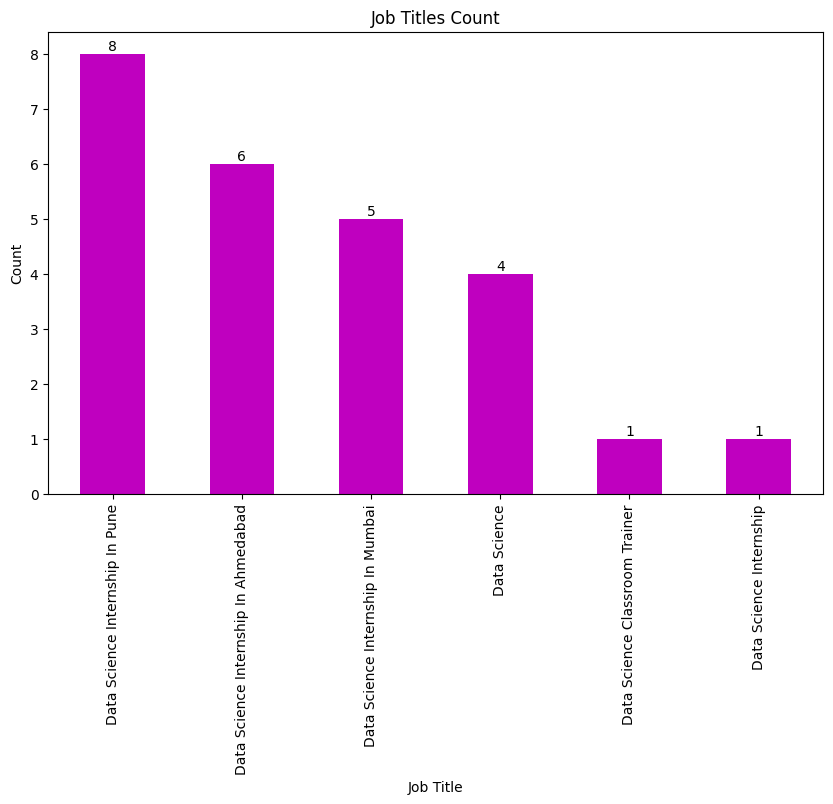

In [ ]:
#  Bar chart of the count of job titles
plt.figure(figsize=(10, 6))
new = data_df['Job Title'].value_counts().plot(kind='bar',color='m')
plt.title('Job Titles Count')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
new.bar_label(new.containers[0])
plt.show()

Data Science  internship is the JobTitle having most count and the least for classroom Trainer-Data Science

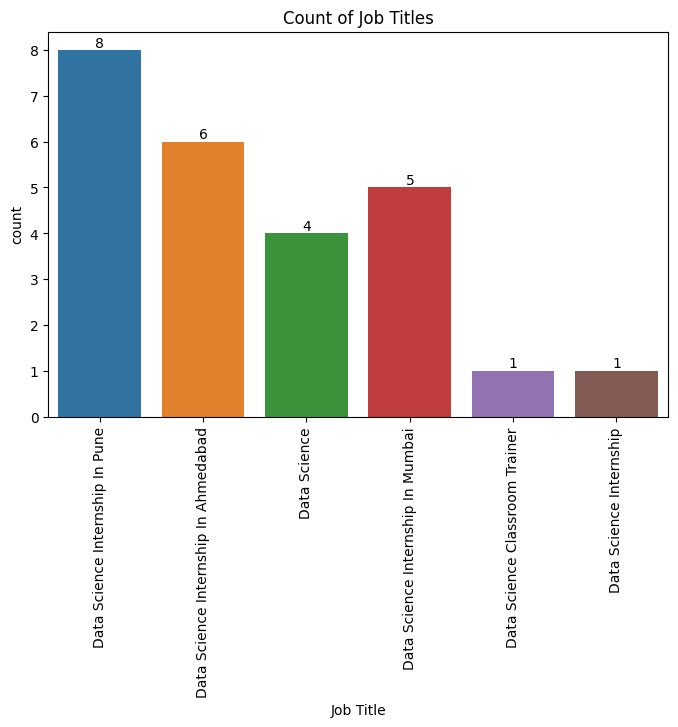

In [ ]:
# Plot 1: Count of job titles
plt.figure(figsize=(8, 5))
new = sns.countplot(data=data_df, x='Job Title')
plt.title('Count of Job Titles')
plt.xticks(rotation=90)
new.bar_label(new.containers[0])
plt.show()

Most number of jobs titles are for the internship of data science in pune , Mumbai and Ahmedabad

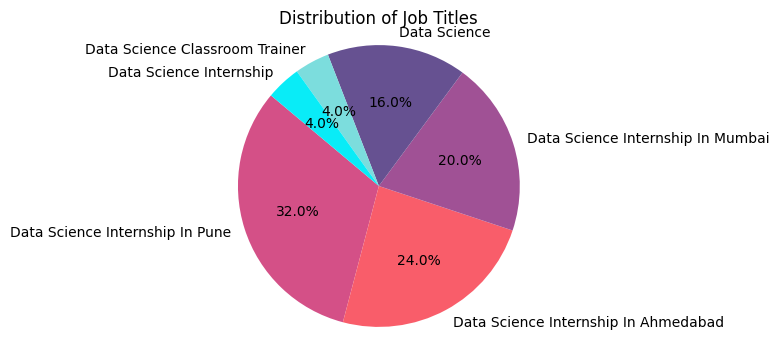

In [ ]:
# Get the count of each job title
job_title_counts = data_df['Job Title'].value_counts()

# Plot a pie chart
col = ["#d45087","#f95d6a","#a05195","#665191","#7CDDDD","#09ECF7"]
plt.figure(figsize=(4, 4))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140,colors =col)
plt.title('Distribution of Job Titles')
plt.axis('equal')
plt.show()

Half of the jobs in data science field is only in pune and Ahmedabad for internship

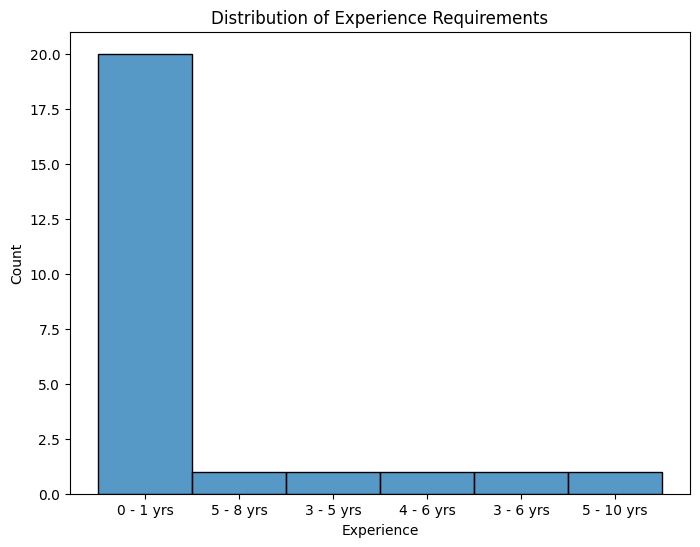

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data_df, x='Experience Req', bins=10)
plt.title('Distribution of Experience Requirements')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.show()

There are lots of requirement for the jobs and most of the companies are hiring for the freshers.

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


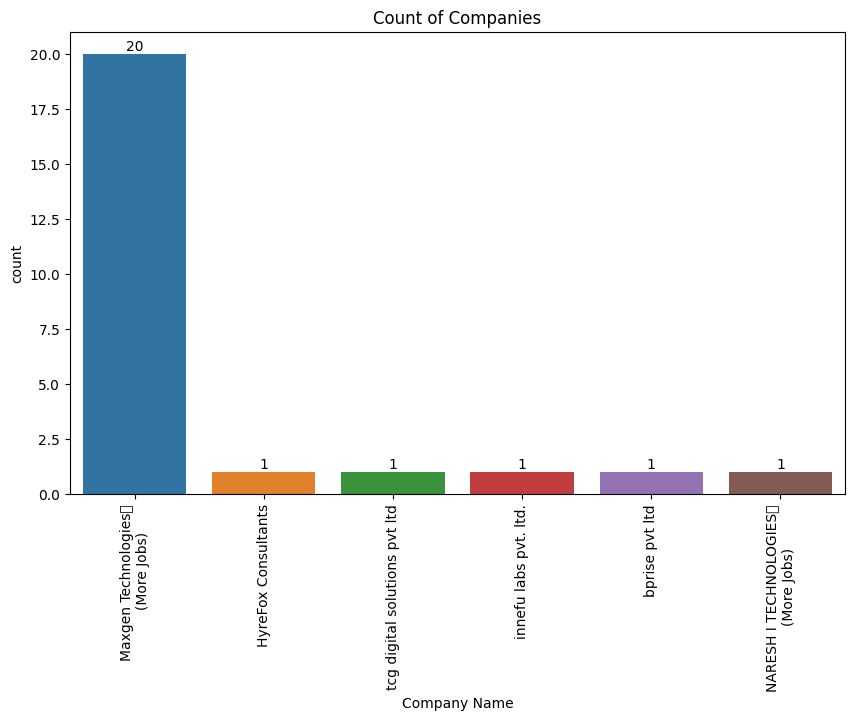

In [ ]:
# Count of unique companies
plt.figure(figsize=(10, 6))
new = sns.countplot(data=data_df, x='Company Name')
plt.title('Count of Companies')
plt.xticks(rotation=90)
new.bar_label(new.containers[0])
plt.show()

Count of Maxgen tech. is higher then other .there are lot of requirement in this company


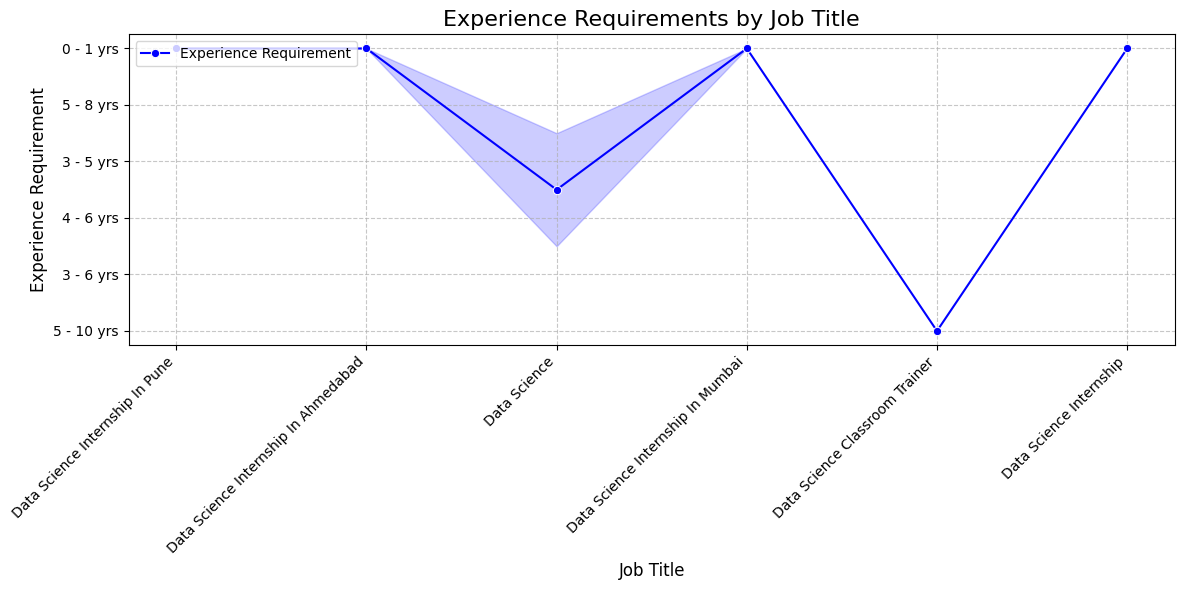

In [ ]:
# Create a line plot for 'Experience Req' by 'Job Title

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_df, x='Job Title', y='Experience Req', marker='o', color='b', label='Experience Requirement')
plt.title('Experience Requirements by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Experience Requirement', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


There are mostly lots of jobs in data science after 2 years for first few years most companies hire on the internship

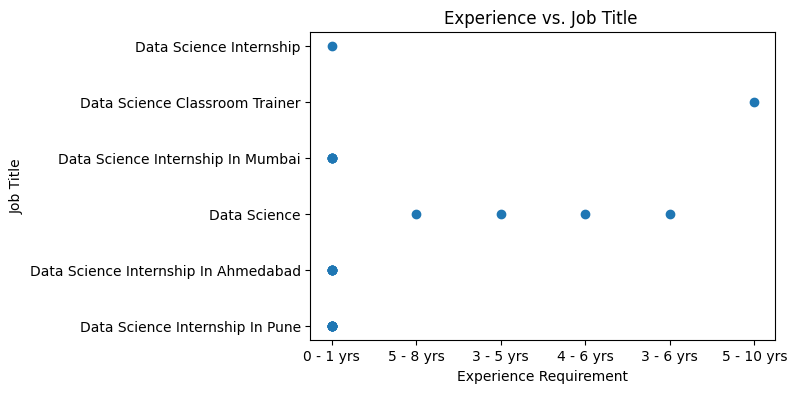

In [ ]:
# Create a scatter plot for 'Experience Req' vs. 'Salary'
plt.figure(figsize=(6, 4))
plt.scatter(data_df['Experience Req'], data_df['Job Title'])
plt.title('Experience vs. Job Title ')
plt.xlabel('Experience Requirement')
plt.ylabel('Job Title')
plt.show()

Most of the jobs for the freshers is for the internship

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


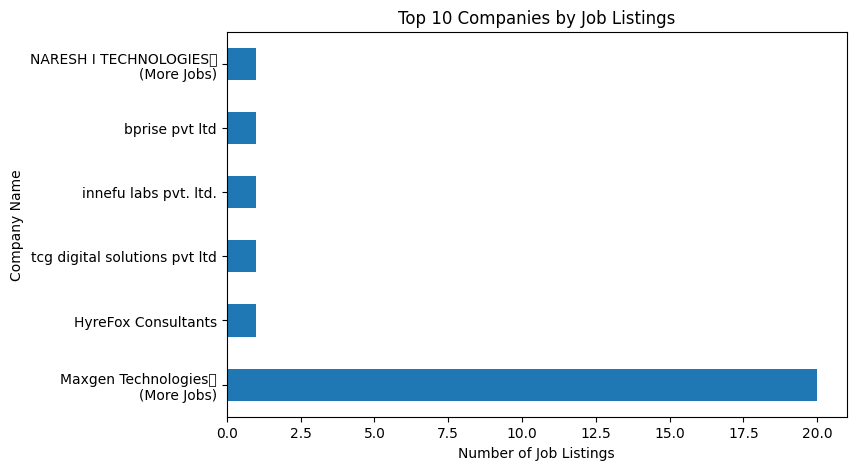

In [ ]:
# Assuming 'Company Name' is a column in your job_df
top_10_companies = data_df['Company Name'].value_counts().head(10)

#  horizontal bar plot for the top 10 companies
plt.figure(figsize=(8, 5))
top_10_companies.plot(kind='barh')
plt.title('Top 10 Companies by Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company Name')
plt.show()

# **Conclusion**

   - "Data Science" has the highest frequency among job titles.
   - The least frequent job title is "Office Trainer-Data Science."
   - The majority of job postings require 0-1 years of experience, indicating a demand for entry-level professionals.
   - The second-highest demand is for candidates with 10 years of experience.
   - Most of the entry - level jobs are for the internship .

   "Maxgen Technologies" stands out with a high count of job postings compared to other companies.
   - Additional company-related observations can be made by analyzing the dataset.
  Consider exploring the distribution of job locations, salary ranges, or specific skills mentioned in the job postings for a more comprehensive understanding.

These observations provide initial insights into the job market data obtained from TimesJob.
